In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset=pd.read_csv('../input/mobile-price-classification/train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
dataset.std()

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
price_range         1.118314
dtype: float64

**Heatmap Correlation**

Text(0.5, 1.0, 'KORELASI ANTARA FITUR ')

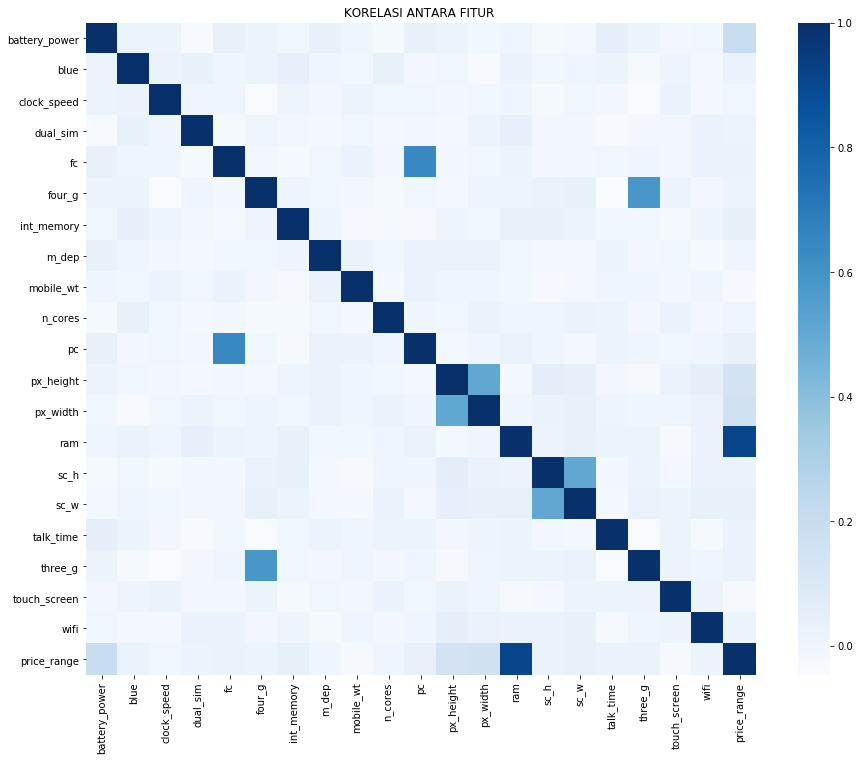

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=dataset.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues')
r.set_title("KORELASI ANTARA FITUR ")

In [7]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

**RAM vs Battery Power**

In [8]:
import plotly.graph_objects as go

df = pd.read_csv('../input/mobile-price-classification/train.csv')

fig = go.Figure()
fig.add_trace(go.Box(
    y=df['ram'],
    name="RAM",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)'
))

fig.add_trace(go.Box(
    y=df['battery_power'],
    name="Battery Power",
    boxpoints=False, # no data points
    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
))

fig.update_layout(title_text="RAM dan Battery Power")
#print(fig)
fig.show()

**Price Range - RAM**

In [9]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('../input/mobile-price-classification/train.csv')
#df.head()

fig = px.line(df, x = 'ram', y = 'price_range', title='PRICE RANGE - RAM')
fig.show()

**Scatterplot Phone Height - Phone Width**

In [10]:
import plotly.graph_objects as go
import pandas as pd
dataset = pd.read_csv('../input/mobile-price-classification/train.csv')
fig = go.Figure(data=go.Scatter(
    x=dataset['px_width'],
    name='Phone Width',
    mode='markers',
    marker=dict(
    color='rgb(107,174,214)')
))

fig = go.Figure(data=go.Scatter(
    y=dataset['px_height'],
    name='Phone Heigt',
    mode='markers',
    marker=dict(
    color='rgba(219, 64, 82, 0.6)')
))
#print(fig)
fig.update_layout(title_text="Scatterplot Phone Height Phone Width")
fig.show()

In [11]:
import plotly.graph_objects as go
import pandas as pd
dataset = pd.read_csv('../input/mobile-price-classification/train.csv')
fig = go.Figure(data=go.Scatter(
    x=dataset['price_range'],
    name='Phone Width',
    mode='markers',
    marker=dict(
    color='rgb(107,174,214)')
))

fig = go.Figure(data=go.Scatter(
    y=dataset['ram'],
    name='Phone Heigt',
    mode='markers',
    marker=dict(
    color='rgba(219, 64, 82, 0.6)')
))
fig = go.Figure(data=go.Scatter(
    y=dataset['battery_power'],
    name='Phone Heigt',
    mode='markers',
    marker=dict(
    color='rgba(219, 64, 82, 0.6)')
))
#print(fig)
fig.update_layout(title_text="Scatterplot Phone Height Phone Width")
fig.show()

**Price Range - RAM**

In [12]:
import plotly.graph_objects as go
import pandas as pd
dataset = pd.read_csv('../input/mobile-price-classification/train.csv')
fig = go.Figure(data=go.Scatter(
    x=dataset['price_range'],
    y=dataset['ram'],
    mode='markers',
    marker=dict()
))
print(fig)
fig.show()

Figure({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'x': array([1, 2, 2, ..., 3, 0, 3]),
              'y': array([2549, 2631, 2603, ..., 3057,  869, 3919])}],
    'layout': {'template': '...'}
})


**Classification Screen Width, Screen Height - RAM, Price Range**

In [13]:
import plotly.io as pio

import pandas as pd

df = pd.read_csv('../input/mobile-price-classification/train.csv')

colors = ['blue', 'orange', 'green', 'red']

opt = []
opts = []
for i in range(0, len(colors)):
    opt = dict(
        target = df['price_range'][[i]].unique(), value = dict(marker = dict(color = colors[i]))
    )
    opts.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['sc_w'],
  y = df['sc_h'],
  text = df['price_range'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(),
  transforms = [
      dict(
        type = 'groupby',
        groups = df['price_range'],
        styles = opts
      ),
      dict(
        type = 'aggregate',
        groups = df['ram'],
        aggregations = [
            dict(target = 'x', func = 'avg'),
            dict(target = 'y', func = 'avg'),
            dict(target = 'marker.size', func = 'sum')
        ]
      )]
)]

layout = dict(
    title = '<b>Screen Width Screen Heigth - Ram Price Range</b><br>Klasifikasai harga berdasarkan Ukuran Screen, RAM dan Harga',
    yaxis = dict(
        type = 'log'
    )
)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

**Wifi, RAM, Price Range**

In [14]:
import plotly.io as pio

import pandas as pd

df = pd.read_csv('../input/mobile-price-classification/train.csv')

colors = ['blue', 'orange', 'green', 'red']

opt = []
opts = []
for i in range(0, len(colors)):
    opt = dict(
        target = df['price_range'][[i]].unique(), value = dict(marker = dict(color = colors[i]))
    )
    opts.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['ram'],
  y = df['wifi'],
  text = df['price_range'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(),
  transforms = [
      dict(
        type = 'groupby',
        groups = df['price_range'],
        styles = opts
      ),
      dict(
        type = 'aggregate',
        groups = df['price_range'],
        aggregations = [
            dict(target = 'x', func = 'avg'),
            dict(target = 'y', func = 'avg'),
            dict(target = 'marker.size', func = 'sum')
        ]
      )]
)]

layout = dict(
    title = '<b>WIFI RAM - Price Range</b><br>Prediksi harga berdasarkan Wifi dan RAM',
    yaxis = dict(
        type = 'log'
    )
)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

**Internal Memory vs Price Range**

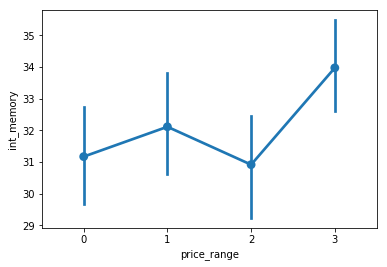

In [15]:
#Internal Memory vs Price Range
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(y="int_memory", x="price_range", data=dataset)

**Pengaruh RAM terhadap Harga**

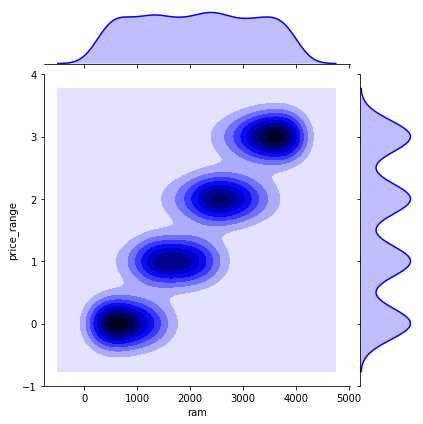

In [16]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='blue',kind='kde');

**3G & 4G Support**

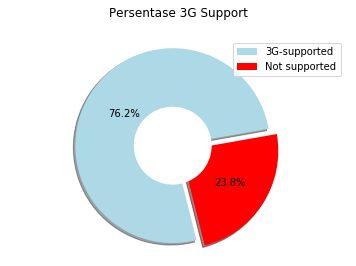

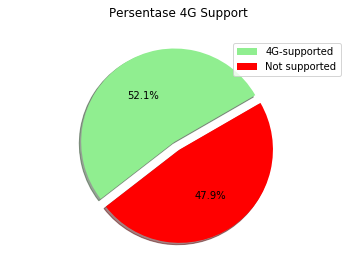

In [17]:
#3G

labels = '3G-supported','Not supported'
colors = ['lightblue', 'red']
values=dataset['three_g'].value_counts().values
explode=(0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, colors=colors, autopct='%1.1f%%',shadow=True,startangle=10)
plt.legend(labels, loc='best')
plt.title("Persentase 3G Support\n")
ax1.axis('equal')

#center circle
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

#4G

labels4g = '4G-supported','Not supported'
colors = ['lightgreen', 'red']
values4g = dataset['four_g'].value_counts().values
explode=(0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(values4g, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle=30)
plt.legend(labels4g, loc='best')
plt.title("Persentase 4G Support\n")
ax1.axis('equal')
plt.show()

**Battery power vs Price Range (mAh)**

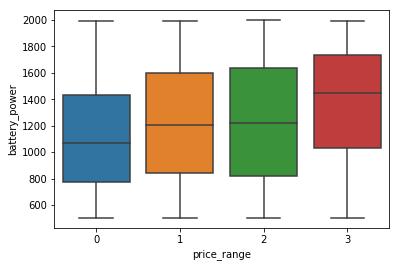

In [18]:
#Battery power vs Price Range dalam mAh

sns.boxplot(x="price_range", y="battery_power", data=dataset)

**Front Camera, Primary Camera**

Text(0.5, 0, 'MegaPixels')

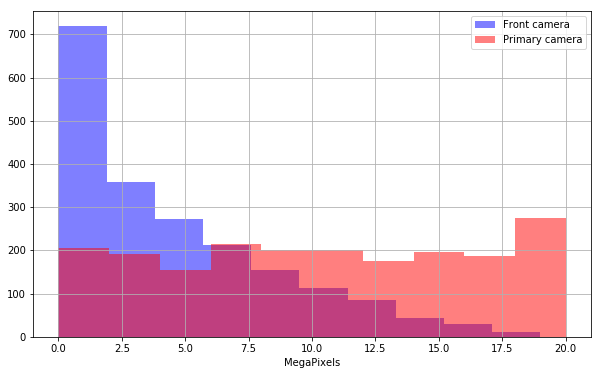

In [19]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5, color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

**Price Range - RAM**

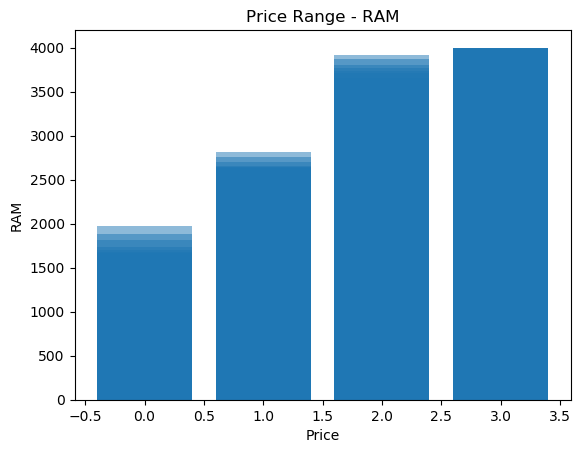

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()

dataset=pd.read_csv('../input/mobile-price-classification/train.csv')

price = dataset['price_range']
y_pos = np.arange(len(price))
ram = dataset['ram'] #jumlah nilai sesuai dengan jumlah object

plt.bar(price, ram, align = 'center', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('RAM')
plt.title('Price Range - RAM')
#plt.yticks(y_pos, price, 'ram')

plt.show()

**Battery Power - RAM**

In [21]:
import pandas as pd
import plotly.express as px

fig = px.line(df, x = 'battery_power', y = 'ram', title='Battery Power - RAM')
fig.show()

In [22]:
X=dataset.drop('price_range',axis=1)

In [23]:
y=dataset['price_range']

In [24]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [25]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#HASIL LINEAR REGRESI
lm.score(X_test,y_test)

0.9132801488185275

In [27]:
#Creating & Training KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [28]:
knn.score(X_test,y_test)

0.9212121212121213

In [29]:
#Elbow Method For optimum value of K

error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

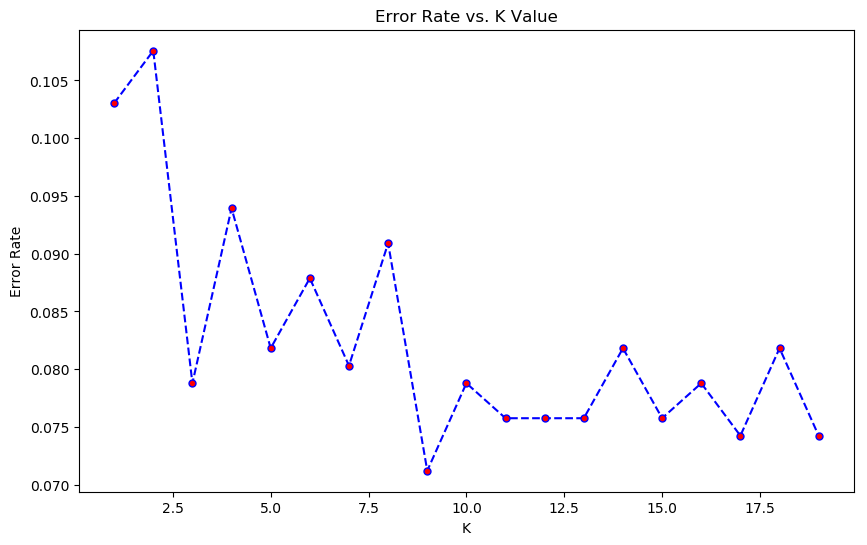

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
#Creating & Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logmodel.score(X_test,y_test)

0.746969696969697

In [33]:
#Creating & Training Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
dtree.score(X_test,y_test)

0.8242424242424242

In [35]:
#Tree Visualization

feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rfc.score(X_test,y_test)

0.8696969696969697

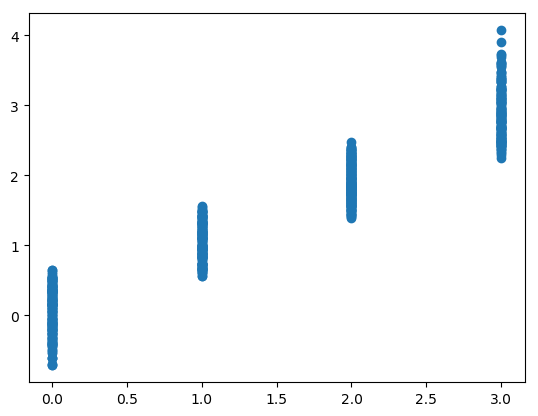

In [37]:
y_pred=lm.predict(X_test)
plt.scatter(y_test,y_pred)

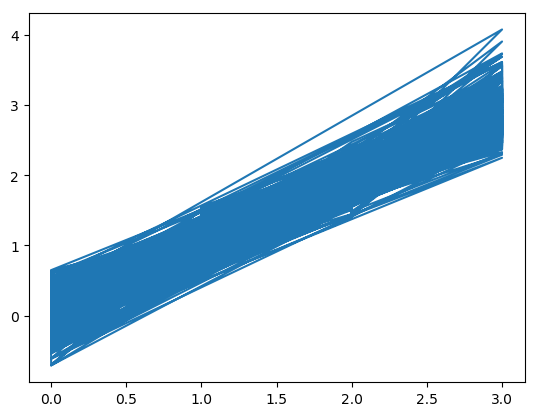

In [38]:
plt.plot(y_test,y_pred)

In [39]:
# Hasil : KKN

from sklearn.metrics import classification_report,confusion_matrix

pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [40]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


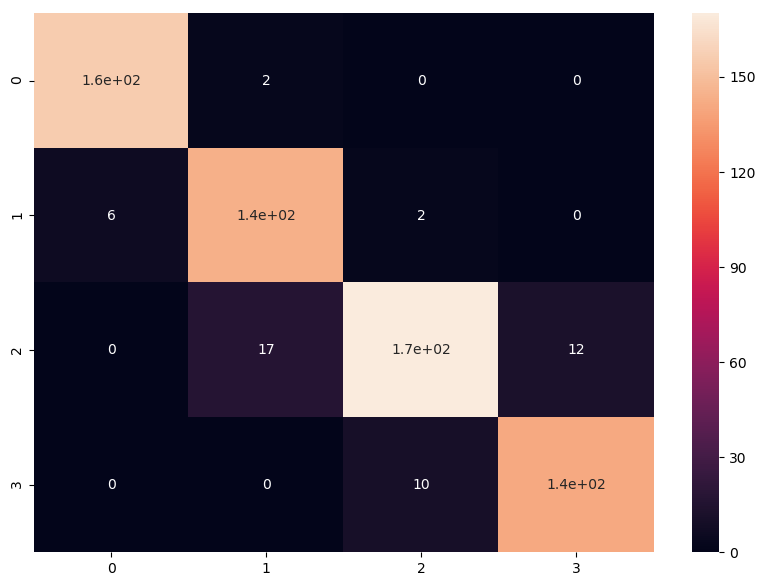

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)